In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import numpy as np



In [10]:

# Load X and y from pickle files
with open("X.pickle", "rb") as file:
    X = pickle.load(file)

with open("y.pickle", "rb") as file:
    y = pickle.load(file)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Normalize the input data
X = X / 255.0

dense_layers = [0]
layer_sizes = [25]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs2epoch".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=20,
                      epochs=1,
                      validation_split=0.2,
                      callbacks=[tensorboard])

model.save('25x2x0.keras')

3-conv-25-nodes-0-dense-1717639654
295/295 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8017 - loss: 0.4328 - val_accuracy: 0.9193 - val_loss: 0.2106


In [36]:
import cv2
import tensorflow as tf

CATEGORIES = ["Beer", "Plastic"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [31]:
model = tf.keras.models.load_model("50x1x0.keras")

In [24]:
prediction = model.predict([prepare(r'C:\Users\Administrator\Desktop\Computer Vision\Project\check data\plastic\20_jpg.rf.c637a9b24f96f2671be1e011ee189a6b.jpg')])  # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT
print(CATEGORIES[int(prediction[0][0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Plastic


In [11]:
import os
import cv2
import tensorflow as tf

CATEGORIES = ["Beer", "Plastic"]

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

def load_and_predict(model, folder_path):
    correct_predictions = {category: 0 for category in CATEGORIES}
    total_images = {category: 0 for category in CATEGORIES}
    total_correct_predictions = 0
    total_images_count = 0
    
    for category in CATEGORIES:
        path = os.path.join(folder_path, category)
        for img in os.listdir(path):
            try:
                img_array = prepare(os.path.join(path, img))
                prediction = model.predict(img_array)
                predicted_label = CATEGORIES[int(prediction[0][0])]
                actual_label = category
                print("Predicted:", predicted_label, "| Actual:", actual_label)
                if predicted_label == actual_label:
                    correct_predictions[category] += 1
                    total_correct_predictions += 1
                total_images[category] += 1
                total_images_count += 1
            except Exception as e:
                pass
    
    accuracy_per_class = {category: (correct_predictions[category] / total_images[category] * 100) for category in CATEGORIES}
    total_accuracy = (total_correct_predictions / total_images_count) * 100
    return accuracy_per_class, total_accuracy
# Load the model
model = tf.keras.models.load_model("25x2x0.keras")
# Path to the directory containing the image data
data_path = r'C:\Users\Administrator\Desktop\Computer Vision\Project\check data'
# Calculate accuracy per class and display predictions
accuracy_per_class, total_accuracy = load_and_predict(model, data_path)
for category, accuracy in accuracy_per_class.items():
    print(f"Accuracy for {category}: {accuracy:.2f}%")
print(f"Total Accuracy: {total_accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Plastic | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted: Plastic | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted: Plastic | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted: Plastic | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted: Plastic | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: Beer | Actual: Beer
1/1 ━━━━━━━━━━━━━━

In [9]:
!pip install tensorflow_hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 2.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.7 MB 4.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.1/1.7 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 1.4/1.7 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.8 MB/s eta 0:00:00


In [9]:
import cv2
from ultralytics import YOLO

# Load YOLO model
checkpoint_path = r"C:\Users\Administrator\Desktop\Computer Vision\Project\detection\train\weights\best.pt"
model = YOLO(checkpoint_path)

# Object classes
classNames = ["Bottle"]

# Start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

while True:
    # Read frame from webcam
    ret, frame = cap.read()

    if not ret:
        break

    # Perform object detection
    results = model(frame, stream=True)

    # Draw bounding boxes and labels
    for r in results:
        boxes = r.boxes

        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cls = int(box.cls[0])

            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 3)
            cv2.putText(frame, classNames[cls], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('Object Detection', frame)

    # Check for 'q' key press to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 690.7ms
Speed: 16.0ms preprocess, 690.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [20]:
!pip3 install opencv-python


In [21]:
from ultralytics import YOLO
import cv2
import math
# start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# model
checkpoint_path = r"C:\Users\Administrator\Desktop\Computer Vision\Project\detection\train\weights\best.pt"
model = YOLO(checkpoint_path)

# object classes
classNames = ["Bottle"
              ]


while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 195.5ms
Speed: 6.0ms preprocess, 195.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


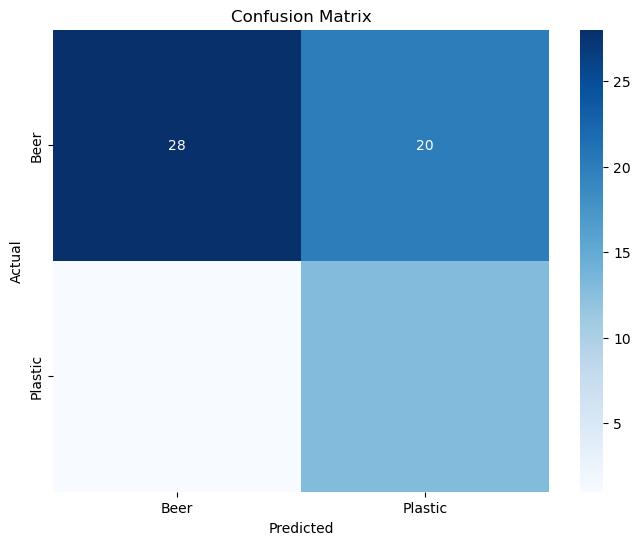

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Corrected lists with equal lengths
actual = [
    'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer',
    'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer',
    'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer',
    'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer',
    'Beer', 'Beer', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic',
    'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic'
]
predicted = [
    'Beer', 'Beer', 'Plastic', 'Beer', 'Beer', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Beer',
    'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Plastic', 'Beer', 'Plastic', 'Plastic', 'Plastic',
    'Plastic', 'Plastic', 'Beer', 'Beer', 'Plastic', 'Beer', 'Beer', 'Beer', 'Beer', 'Beer', 'Plastic',
    'Plastic', 'Beer', 'Beer', 'Plastic', 'Plastic', 'Beer', 'Beer', 'Beer', 'Beer', 'Plastic', 'Beer',
    'Beer', 'Plastic', 'Beer', 'Plastic', 'Plastic', 'Beer', 'Plastic', 'Plastic', 'Plastic', 'Plastic',
    'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic', 'Plastic'
]

# Generate confusion matrix
conf_matrix = confusion_matrix(actual, predicted, labels=['Beer', 'Plastic'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Beer', 'Plastic'], yticklabels=['Beer', 'Plastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
